Lineer Regression

In [1]:
from sklearn.datasets import make_regression

In [7]:
x, y = make_regression(n_samples=100, n_features=1,noise=5,random_state=41)

In [8]:
import matplotlib.pyplot as plt

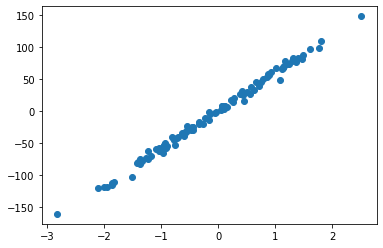

In [9]:
plt.scatter(x,y)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()

In [12]:
model.fit(x,y)

LinearRegression()

In [14]:
model.score(x,y)

0.9946229540223691

In [15]:
x_test, y_test = make_regression(n_samples=100, n_features=1,noise=20,random_state=41)

In [16]:
y_predict = model.predict(x_test)

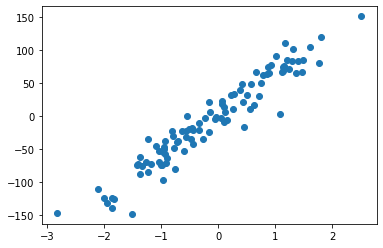

In [17]:
plt.scatter(x_test,y_test)

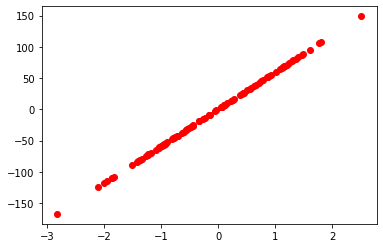

In [18]:
plt.scatter(x_test,y_predict, color="red")

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [24]:
mse = mean_squared_error(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)

In [25]:
print("standart deviation", y.std(), "\n")
print("Mean squared error", mse)
print("Mean absolute error", mae)

standart deviation 62.75954426678739 

Mean squared error 342.46865043939033
Mean absolute error 14.371058482819574


# Multiple Linear Regression

In [26]:
xm, ym = make_regression(n_samples=100, n_features=1,noise=5,random_state=41)

In [27]:
model.fit(xm,ym)

LinearRegression()

In [29]:
r_sq = model.score(xm,ym)
print("coefficient of determination: ",r_sq)
print("intercept: ", model.intercept_)
print("slope: ", model.coef_)

coefficient of determination:  0.9946229540223691
intercept:  0.39730162629757704
slope:  [59.15030478]


# Decision Trees

In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [32]:
data = pd.read_csv("ML/datasets/iris.csv")

In [34]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [37]:
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [38]:
data["Species"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

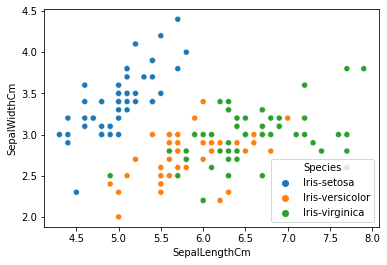

In [42]:
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm", hue="Species", data=data)

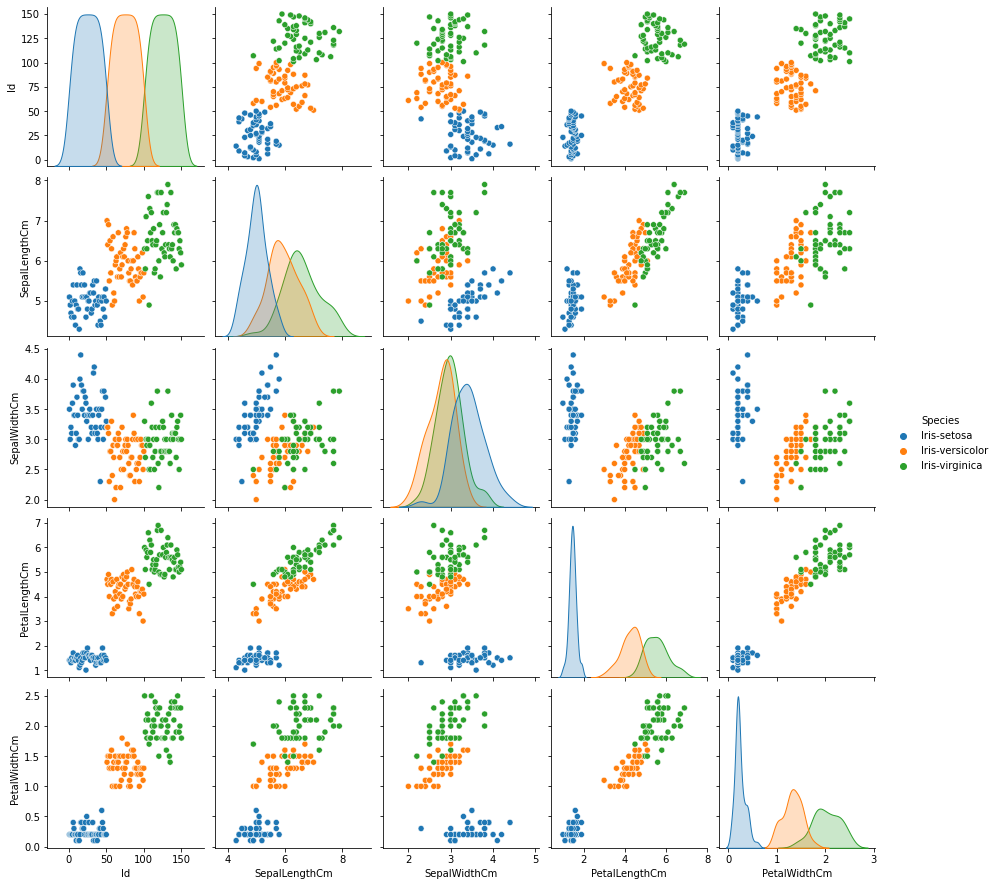

In [43]:
sns.pairplot(hue="Species", data=data)

In [68]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

categories = list(label_encoder.inverse_transform([0,1,2]))
categories

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [47]:
label_encoder = LabelEncoder()
data["Label"] = label_encoder.fit_transform(data["Species"])
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Label
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [50]:
data.drop(["Id","Species"], axis=1, inplace=True)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [52]:
x, y = data.iloc[:, :-1], data.iloc[:,-1: ]

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=41)

In [54]:
x_test.shape

(50, 4)

In [57]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, random_state=41)

clf.fit(x_train, y_train)

print("Accuracy of test: ", clf.score(x_test, y_test))
print("Accuracy of train: ", clf.score(x_train, y_train))

Accuracy of test:  0.92
Accuracy of train:  1.0


In [58]:
clf.feature_importances_

array([0.        , 0.        , 0.58327956, 0.41672044])

<function matplotlib.pyplot.show(*args, **kw)>

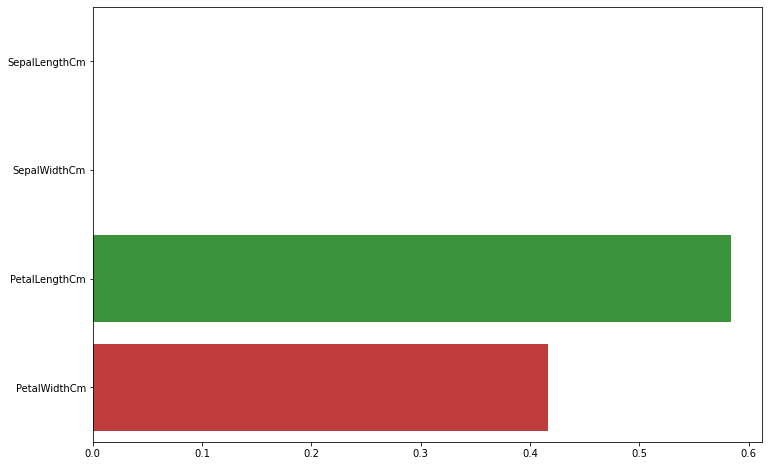

In [59]:
plt.figure(figsize=(12,8))
importance = clf.feature_importances_
sns.barplot(x=importance, y=x.columns)
plt.show

In [61]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      0.95      0.90        20
           2       0.93      0.82      0.87        17

    accuracy                           0.92        50
   macro avg       0.93      0.92      0.93        50
weighted avg       0.92      0.92      0.92        50



In [62]:
print("Precision = {}".format(precision_score(y_test,pred,average='macro')))
print("Recall    = {}".format(recall_score(y_test,pred,average='macro')))
print("Accuracy  = {}".format(accuracy_score(y_test,pred)))
print("f1 Score  = {}".format(f1_score(y_test,pred,average='macro')))

Precision = 0.9323232323232323
Recall    = 0.9245098039215686
Accuracy  = 0.92
f1 Score  = 0.9265873015873015


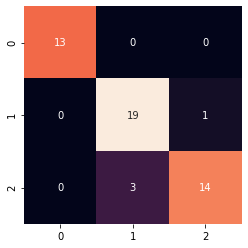

<Figure size 864x576 with 0 Axes>

In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
plt.figure(figsize=(12,8))
plt.show()

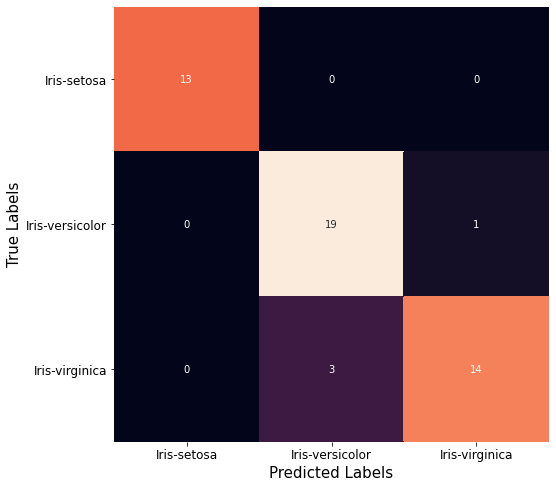

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(12,8))
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)

plt.show()